<a href="https://colab.research.google.com/github/vicalfayo09/steer_price_prediction_ml/blob/main/datasetloading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAIN CODE**

**Google Drive Authntication for loading dataset**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
#https://drive.google.com/file/d/1yi6uL3islOb2a5XZEBmQlF1NnSRroMHT/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1yi6uL3islOb2a5XZEBmQlF1NnSRroMHT'})

In [7]:
fileDownloaded.GetContentFile('AJA01.20221011194750.csv')

In [8]:
import pandas as pd
df = pd.read_csv('AJA01.20221011194750.csv')

df.head()

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks 200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks 250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks 300-349kg,Euro,238.29
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks 350-399kg,Euro,270.47
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks 400-449kg,Euro,302.43


**Description of data**

In [9]:
df.describe(include="all")

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
count,1288,1288,1288.000000,1288.000000,1288,1288,1288,1207.000000
unique,2,2,NaN,NaN,14,14,1,NaN
top,AJA01C1,Cattle Price per Head,NaN,NaN,B200,Bullocks 200-249kg,Euro,NaN
freq,644,644,NaN,NaN,92,92,1288,NaN
mean,NaN,NaN,1998.500000,1998.500000,NaN,NaN,NaN,369.926001
std,NaN,NaN,13.281075,13.281075,NaN,NaN,NaN,258.764418
min,NaN,NaN,1976.000000,1976.000000,NaN,NaN,NaN,46.240000
25%,NaN,NaN,1987.000000,1987.000000,NaN,NaN,NaN,154.950000
50%,NaN,NaN,1998.500000,1998.500000,NaN,NaN,NaN,228.073462
75%,NaN,NaN,2010.000000,2010.000000,NaN,NaN,NaN,560.516376


In [10]:
df.isna().sum()

STATISTIC CODE     0
Statistic          0
TLIST(A1)          0
Year               0
C01782V02140       0
Type of Cattle     0
UNIT               0
VALUE             81
dtype: int64

In [11]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

**PDF for Value Price in Euros**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


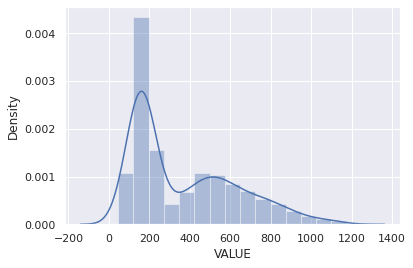

In [12]:
sns.distplot(df['VALUE'])

In [13]:
new = df['Type of Cattle'].str.split(" ", n = 1, expand=True)

In [14]:
df['Type of Cattle'] = new[0]
df.insert(6, "Weight", new[1])

In [15]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400-449kg,Euro,216.796269


**Imputation to fill null values**

In [16]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

x = df['Weight']
y = df['VALUE']
newprice = df.iloc[:, 8].values


In [17]:
price = newprice.reshape(-1, 1)
price

array([[         nan],
       [         nan],
       [238.29      ],
       ...,
       [216.96599474],
       [216.79626892],
       [         nan]])

In [18]:
#To calculate the median use imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer = imputer.fit(price)
y = imputer.transform(price)
print(y)

[[228.07346206]
 [228.07346206]
 [238.29      ]
 ...
 [216.96599474]
 [216.79626892]
 [228.07346206]]


In [19]:
df['VALUE'] = y

In [20]:
df.isna().sum()

STATISTIC CODE    0
Statistic         0
TLIST(A1)         0
Year              0
C01782V02140      0
Type of Cattle    0
Weight            0
UNIT              0
VALUE             0
dtype: int64

In [21]:
df['Type of Cattle'] = df['Type of Cattle'].replace("Cows", "Bullocks")
df['Weight'] = df['Weight'].replace("for slaughter", "550")

In [22]:
df.rename(columns = {'Weight': 'Weight in kg'}, inplace=True)

In [23]:
df['Weight in kg']
type(df['Weight in kg'])
df.dtypes

STATISTIC CODE     object
Statistic          object
TLIST(A1)           int64
Year                int64
C01782V02140       object
Type of Cattle     object
Weight in kg       object
UNIT               object
VALUE             float64
dtype: object

In [24]:
df['Weight in kg'] = df['Weight in kg'].str.replace('\D', ' ')

<ipython-input-24-ae11e170d5dd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Weight in kg'] = df['Weight in kg'].str.replace('\D', ' ')


In [25]:
new2 = df['Weight in kg'].str.split(" ", n = 1, expand=True)
split1 = df.insert(7, "Min Weight in kg", new2[0])
split2 = df.insert(8, "Max Weight in kg", new2[1])

In [26]:
data1 = df.copy()
data1['Min Weight in kg'] = pd.to_numeric(data1['Min Weight in kg'])


In [27]:
data1['Min Weight in kg'].dtypes

dtype('int64')

**PDF for minimum weight in kg**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


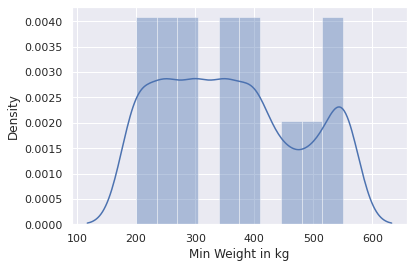

In [28]:
sns.distplot(data1['Min Weight in kg'])

In [29]:
data1['Min Weight in kg'] = data1['Min Weight in kg'].fillna(550)
data1['Max Weight in kg'] = pd.to_numeric(data1['Max Weight in kg'], errors= 'coerce')

In [30]:
data1

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,Min Weight in kg,Max Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200 249,200,249.0,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250 299,250,299.0,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300 349,300,349.0,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350 399,350,399.0,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400 449,400,449.0,Euro,302.430000
...,...,...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250 299,250,299.0,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300 349,300,349.0,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350 399,350,399.0,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400 449,400,449.0,Euro,216.796269


In [31]:
data1 = data1.dropna(axis = 0)

In [32]:
type(df['Max Weight in kg'].values)

numpy.ndarray

In [33]:
df.dropna(inplace=True,axis=0)

In [34]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,Min Weight in kg,Max Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200 249,200,249,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250 299,250,299,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300 349,300,349,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350 399,350,399,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400 449,400,449,Euro,302.430000
...,...,...,...,...,...,...,...,...,...,...,...
1282,AJA01C2,Cattle Price per 100 Kg,2021,2021,H200,Heifers,200 249,200,249,Euro,222.738691
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250 299,250,299,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300 349,300,349,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350 399,350,399,Euro,216.965995


**SQLite storage of data**

In [35]:
import sqlite3
import sqlalchemy

In [36]:
engine = sqlalchemy.create_engine('sqlite:///steer_data.db')

In [37]:
df.to_sql('steer_statistics_table', engine, if_exists='replace', index=False)

In [38]:
pd.read_sql('steer_statistics_table', engine)

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,Min Weight in kg,Max Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200 249,200,249,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250 299,250,299,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300 349,300,349,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350 399,350,399,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400 449,400,449,Euro,302.430000
...,...,...,...,...,...,...,...,...,...,...,...
1191,AJA01C2,Cattle Price per 100 Kg,2021,2021,H200,Heifers,200 249,200,249,Euro,222.738691
1192,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250 299,250,299,Euro,216.991177
1193,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300 349,300,349,Euro,215.245632
1194,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350 399,350,399,Euro,216.965995


In [39]:
x = data1.iloc[:,7:9]
y = data1['VALUE']

In [40]:
x

,Min Weight in kg,Max Weight in kg
0,200,249.0
1,250,299.0
2,300,349.0
3,350,399.0
4,400,449.0
...,...,...
1282,200,249.0
1283,250,299.0
1284,300,349.0
1285,350,399.0


In [41]:
#x.to_sql('steer_weight_table')

In [42]:
x['Max Weight in kg'] = x.iloc[:, 1].astype(int)

In [43]:
x

,Min Weight in kg,Max Weight in kg
0,200,249
1,250,299
2,300,349
3,350,399
4,400,449
...,...,...
1282,200,249
1283,250,299
1284,300,349
1285,350,399


In [44]:
x.dtypes

Min Weight in kg    int64
Max Weight in kg    int64
dtype: object

In [45]:
x.to_sql('steer_weight_table', engine, if_exists='replace', index=False)

In [46]:
pd.read_sql('steer_weight_table', engine)

,Min Weight in kg,Max Weight in kg
0,200,249
1,250,299
2,300,349
3,350,399
4,400,449
...,...,...
1099,200,249
1100,250,299
1101,300,349
1102,350,399


In [47]:
x.shape

(1104, 2)

In [48]:
y.shape

(1104,)

Text(0.5, 1.0, 'Steer Price Data')

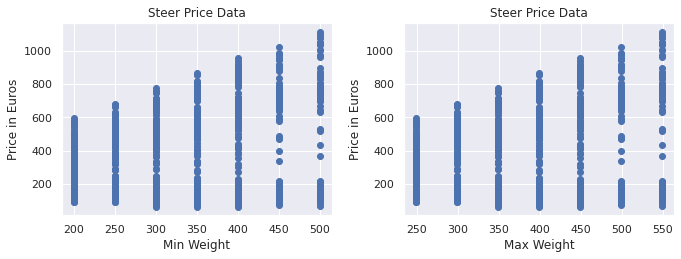

In [49]:
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,4))
fig.tight_layout(pad  = 3.0)
ax1.scatter(x.iloc[:,0],y)
ax1.set_xlabel("Min Weight")
ax1.set_ylabel("Price in Euros")
ax1.set_title("Steer Price Data")

ax2.scatter(x.iloc[:,1],y)
ax2.set_xlabel("Max Weight")
ax2.set_ylabel("Price in Euros")
ax2.set_title("Steer Price Data")

**Scaling of features and log transformation of target value price**

In [50]:
from sklearn.preprocessing import StandardScaler
value = np.log(y)
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)




In [51]:
x_scaled.shape

(1104, 2)

In [52]:
#x_scaled

**Trained model**

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from math import sqrt
x_train,x_test,y_train,y_test=train_test_split(x_scaled, value,train_size=0.8, random_state=365)
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn.score(x_train,y_train)

-0.2488682354155607

In [54]:
r2_score(y_test, knn_pred)

-0.36484682743811314

In [55]:
mean_squared_error(y_test, knn_pred)

0.6377199041969762

In [56]:
rmse = sqrt(mean_squared_error(y_test, knn_pred))
rmse

0.7985736686098386

**Using Pickle to serialize model**

In [57]:
import pickle as pk

In [58]:
model = knn
model.fit(x_train, y_train)
pickle_out = open('steer_model.pkl', 'wb')
pk.dump(model, pickle_out)
model.fit(x_train,y_train)
pred = model.predict(x_test)
#pickle_out.close()

In [59]:
pickled_model = pk.load(open('steer_model.pkl', 'rb'))
pickled_model.predict(x_test)

array([5.96049977, 6.21751196, 5.34026827, 5.32644107, 5.34026827,
       6.21751196, 5.34026827, 5.96049977, 5.88600622, 5.88600622,
       5.96049977, 5.88600622, 5.96049977, 5.34026827, 5.42037191,
       5.34026827, 6.21751196, 5.32644107, 6.21751196, 5.3240985 ,
       5.96049977, 6.21751196, 5.34026827, 5.96049977, 5.88600622,
       5.34026827, 5.96049977, 5.96049977, 5.96049977, 6.21751196,
       6.21751196, 5.88600622, 5.34026827, 5.32644107, 5.96049977,
       5.34026827, 5.3240985 , 5.42037191, 5.34026827, 5.32644107,
       5.32644107, 6.21751196, 5.96049977, 5.88600622, 5.88600622,
       5.96049977, 5.96049977, 5.96049977, 6.21751196, 5.96049977,
       5.34026827, 5.34026827, 5.88600622, 5.42037191, 5.32644107,
       5.34026827, 5.96049977, 5.3240985 , 5.88600622, 5.32644107,
       5.96049977, 5.88600622, 5.96049977, 6.21751196, 5.96049977,
       5.96049977, 5.34026827, 6.21751196, 6.21751196, 6.21751196,
       5.34026827, 5.32644107, 5.32644107, 5.3240985 , 6.21751

In [60]:
x_test.shape

(221, 2)

In [106]:
#!pip install flask==0.12.2
#!pip install flask-ngrok
#!pip install flask-bootstrap

In [105]:
#!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok

In [104]:
#!ngrok authtoken 2IPVkOKmGqvykweHVVEg0J9xY8X_3E9ktLLD4qbJeWToCN4B

**Error rate for different K-values**

In [66]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.985168087622731
RMSE value for k=  2 is: 0.8617046692549333
RMSE value for k=  3 is: 0.8183168209348458
RMSE value for k=  4 is: 0.7824732510628633
RMSE value for k=  5 is: 0.7985736686098386
RMSE value for k=  6 is: 0.7587362364578889
RMSE value for k=  7 is: 0.7275528650373994
RMSE value for k=  8 is: 0.7210222470046982
RMSE value for k=  9 is: 0.71690199824581
RMSE value for k=  10 is: 0.7292365109012298
RMSE value for k=  11 is: 0.7237253964163658
RMSE value for k=  12 is: 0.7193704489116725
RMSE value for k=  13 is: 0.7154638951823322
RMSE value for k=  14 is: 0.7120215504345271
RMSE value for k=  15 is: 0.7098601731927344
RMSE value for k=  16 is: 0.7012223035351648
RMSE value for k=  17 is: 0.7000452091942736
RMSE value for k=  18 is: 0.6961419500215287
RMSE value for k=  19 is: 0.6927934812271449
RMSE value for k=  20 is: 0.6931633367130542


**Prediction sample using random value**

In [67]:
model.fit(x_train, y_train)
model.predict([[320, 430]])

array([5.42130073])

In [68]:
np.exp([5.47887172])

array([239.57624574])

**Elbow method**

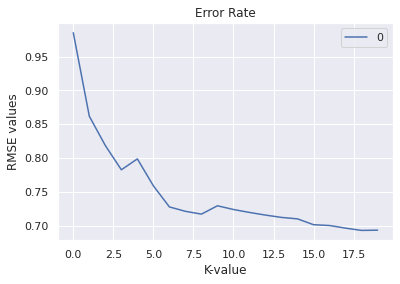

In [69]:
curve = pd.DataFrame(rmse_val)
curve.plot()
plt.xlabel('K-value')
plt.ylabel('RMSE values')
plt.title('Error Rate')
plt.show()

In [70]:
table_data_for_rmse_values = curve
table_data_for_rmse_values.columns = ["RMSE_value"]
table_data_for_rmse_values

,RMSE_value
0,0.985168
1,0.861705
2,0.818317
3,0.782473
4,0.798574
5,0.758736
6,0.727553
7,0.721022
8,0.716902
9,0.729237


**Optimal Value for neighbor**
**Validate model with sample**

**Implementing GridSearchCV**
- For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process. You can simply use gridsearch to find the best value.

In [71]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
knn_pred = model.predict(x_test)
model.best_params_

{'n_neighbors': 9}

In [72]:
r2_score(y_test, knn_pred)

-0.09995146940715349

In [73]:
predictions = pd.DataFrame(knn_pred, columns=["Predictions"])
predictions

,Predictions
0,5.822295
1,5.769415
2,5.354797
3,5.543624
4,5.354797
...,...
216,5.822295
217,5.543624
218,5.543624
219,5.543624


In [74]:
rmse = sqrt(mean_squared_error(y_test, knn_pred))
rmse

0.71690199824581

In [75]:
mse = mean_squared_error(y_test, knn_pred)
mse

0.5139484750888355

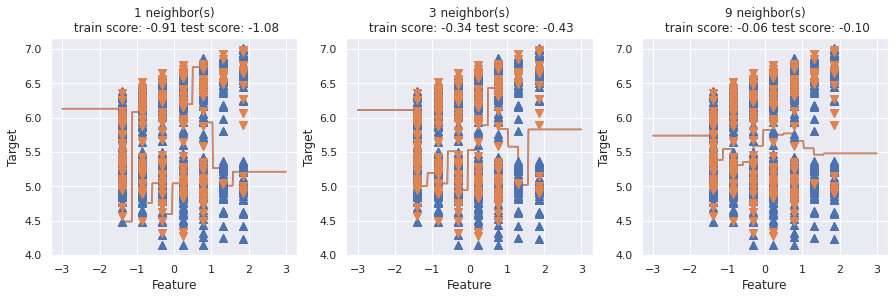

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3 as some of the sample values
line = np.linspace(-3, 3, 1000).reshape(500,2)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', markersize=8, c='C0')
    ax.plot(x_test, y_test, 'v', markersize=8, c='C1')
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(x_train, y_train)
    ,reg.score(x_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")#axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="upper left")

**Training values score after converting from logarithms**

In [77]:
np.exp(-0.91)

0.40252422403363597

In [78]:
np.exp(-0.34)

0.7117703227626097

In [79]:
np.exp(-0.06)

0.9417645335842487

**Test values score after converting from logarithms**

In [80]:
np.exp(-1.08)

0.3395955256449391

In [81]:
np.exp(-0.43)

0.6505090947233165

In [82]:
np.exp(-0.10)

0.9048374180359595

In [101]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 7.8 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 106 kB 64.9 MB/s 
     |████████████████████████████████| 278 kB 61.5 MB/s 
     |████████████████████████████████| 2.3 MB 65.1 MB/s 
     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 10.6 MB/s 
     |████████████████████████████████| 68 kB 7.9 MB/s 
     |████████████████████████████████| 58 kB 6.8 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=0992a601d3bd3547ee17ae02e2be153d7dbb1f4965096701f2e6218bfbfb5fe7
  Stored in direc

In [ ]:
import gradio as gr
import sklearn
import pandas as pd
import requests
#response = requests.get("https://api.frankfurter.app/latest?amount={}&from={'EUR'}&to={to_currency}")
x1 = x['Min Weight in kg']
x2 = x['Max Weight in kg']
def steer_price(x1,x2):
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    model = pk.load(open('steer_model.pkl', 'rb'))
    prediction = model.predict([x1, x2]).tolist()
    prediction = round(np.exp(prediction),2)
    info = "The price is " {prediction * 130.71}
    return {prediction * 130.71}[0]
    #130.71 standard euro to ksh conversion

input1 = gr.inputs.Number(label="Min weight (kg)")

input2 = gr.inputs.Number(label="Max weight (kg)")

output = gr.outputs.Textbox(label= "Steer price")



gui = gr.Interface(fn=steer_price, inputs=[input1, input2],
                   outputs=[output, info]).launch(debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:58: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:21: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>